## Read Data

In [1]:
import pandas as pd
reddit_posts = pd.read_csv('./data/all_posts.csv')
reddit_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9136 entries, 0 to 9135
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9136 non-null   int64  
 1   id            9136 non-null   object 
 2   author        9136 non-null   object 
 3   url           9135 non-null   object 
 4   title         9136 non-null   object 
 5   score         9136 non-null   int64  
 6   selftext      8368 non-null   object 
 7   num_comments  9136 non-null   int64  
 8   upvote_ratio  9136 non-null   float64
 9   permalink     9136 non-null   object 
 10  post_time     9136 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 785.2+ KB


In [2]:
reddit_posts.head(2)

,Unnamed: 0,id,author,url,title,score,selftext,num_comments,upvote_ratio,permalink,post_time
0,0,z34kw9,hope3017,https://www.reddit.com/r/immigration/comments/...,Can I make an H1B transfer while abroad and wa...,1,This is my situation: I traveled to my home co...,0,1.0,/r/immigration/comments/z34kw9/can_i_make_an_h...,2022-11-23 23:53:29
1,1,z30jr0,socuriouslycurious,https://www.reddit.com/r/immigration/comments/...,Australia state nomination and work experience,1,"Hi all, \n\nI hope you are all well. \n\nI hav...",0,1.0,/r/immigration/comments/z30jr0/australia_state...,2022-11-23 21:06:01


In [3]:
reddit_posts.shape

(9136, 11)

In [4]:
del reddit_posts['Unnamed: 0']

# Data Preprocessing

### Missing Value analysis

In [26]:
# Percentage of Missing Data

reddit_posts_missing=reddit_posts.isna()
result=reddit_posts_missing.sum()/len(reddit_posts)
result

id              0.0
author          0.0
url             0.0
title           0.0
score           0.0
selftext        0.0
num_comments    0.0
upvote_ratio    0.0
permalink       0.0
post_time       0.0
dtype: float64

### Handling missing values: Drop rows with missing values

In [27]:
reddit_posts= reddit_posts.dropna()

In [29]:
reddit_posts.drop(['id', 'score'], axis=1)

,author,url,title,selftext,num_comments,upvote_ratio,permalink,post_time
0,hope3017,https://www.reddit.com/r/immigration/comments/...,Can I make an H1B transfer while abroad and wa...,This is my situation: I traveled to my home co...,0,1.0,/r/immigration/comments/z34kw9/can_i_make_an_h...,2022-11-23 23:53:29
1,socuriouslycurious,https://www.reddit.com/r/immigration/comments/...,Australia state nomination and work experience,"Hi all, \n\nI hope you are all well. \n\nI hav...",0,1.0,/r/immigration/comments/z30jr0/australia_state...,2022-11-23 21:06:01
2,moonshine_fox21,https://www.reddit.com/r/immigration/comments/...,our CR1 timeline // may ‘21 &gt; nov ‘22 // AR...,hello! i half-never thought this day would com...,0,1.0,/r/immigration/comments/z2zwst/our_cr1_timelin...,2022-11-23 20:40:16
3,headpats_required,https://www.reddit.com/r/immigration/comments/...,Leaving the US on ESTA and returning as F1.,"Hi, UK citizen here, gonna apply for an F1 vis...",0,1.0,/r/immigration/comments/z2z9kv/leaving_the_us_...,2022-11-23 20:14:26
4,lesmartassaccountant,https://www.reddit.com/r/immigration/comments/...,Apply for a US Passport as a Green Card Holder,"Good evening everyone, \n\nI need advice in re...",0,1.0,/r/immigration/comments/z2x0pm/apply_for_a_us_...,2022-11-23 18:44:46
...,...,...,...,...,...,...,...,...
9130,TheChicEatery,https://www.reddit.com/r/immigration/comments/...,TN visa at port of entry,Do I need a letter from a TN letter from the e...,2,1.0,/r/immigration/comments/r0v0x0/tn_visa_at_port...,2021-11-24 03:18:51
9131,mattysmidnightmusing,https://www.reddit.com/r/immigration/comments/...,My spouse came here to USA on a K1 (fiancé vis...,I should point out that we did in fact marry t...,14,1.0,/r/immigration/comments/r0tzqc/my_spouse_came_...,2021-11-24 02:26:54
9132,Its_squeaks,https://www.reddit.com/r/immigration/comments/...,Should we get married before or after they are...,And which would be easier for immigration to t...,12,1.0,/r/immigration/comments/r0txha/should_we_get_m...,2021-11-24 02:23:51
9133,jamesjeffriesiii,https://www.reddit.com/r/immigration/comments/...,K-1 Visa Flexibility?,Hey…\n\nCan anyone tell me what’s the best Vis...,4,1.0,/r/immigration/comments/r0suq4/k1_visa_flexibi...,2021-11-24 01:29:07


# Data Segregation

### 1. Top Commented Posts

In [30]:

# reddit_posts[["title", "selftext", "post_time"]]

In [31]:
most_commentd_posts = reddit_posts.sort_values(by=['num_comments'], ascending=False)
most_commentd_posts.head(2)

,id,author,url,title,score,selftext,num_comments,upvote_ratio,permalink,post_time
6926,sut7k9,nordb4,https://www.reddit.com/r/immigration/comments/...,"Girlfriend stopped at immigration, what happen...",1,My girlfriend who is a resident from Argentina...,133,1.0,/r/immigration/comments/sut7k9/girlfriend_stop...,2022-02-17 16:45:11
9068,r27xk8,Mindless-Cake4244,https://www.reddit.com/r/immigration/comments/...,Mexican boyfriend in US illegally,1,I met my boyfriend this summer. Things are get...,82,1.0,/r/immigration/comments/r27xk8/mexican_boyfrie...,2021-11-25 22:16:38


### 2. Top Upvoted Posts

In [32]:
reddit_posts_ur_desc = reddit_posts.sort_values(by=['upvote_ratio'], ascending=False)
reddit_posts_ur_desc.head(2)

,id,author,url,title,score,selftext,num_comments,upvote_ratio,permalink,post_time
0,z34kw9,hope3017,https://www.reddit.com/r/immigration/comments/...,Can I make an H1B transfer while abroad and wa...,1,This is my situation: I traveled to my home co...,0,1.0,/r/immigration/comments/z34kw9/can_i_make_an_h...,2022-11-23 23:53:29
5997,tpnhts,immigration-research,https://www.reddit.com/r/immigration/comments/...,Study in Immigration to Improve Evaluations an...,1,Researchers at Fordham University are looking ...,0,1.0,/r/immigration/comments/tpnhts/study_in_immigr...,2022-03-27 16:29:41


### 3. All F1 related posts

In [41]:
f1_visa_keywords = ['f1']
f1_visa_posts = reddit_posts[reddit_posts.selftext.str.lower().str.contains('|'.join(f1_visa_keywords))]
f1_visa_posts.head(3)

,id,author,url,title,score,selftext,num_comments,upvote_ratio,permalink,post_time
3,z2z9kv,headpats_required,https://www.reddit.com/r/immigration/comments/...,Leaving the US on ESTA and returning as F1.,1,"Hi, UK citizen here, gonna apply for an F1 vis...",0,1.0,/r/immigration/comments/z2z9kv/leaving_the_us_...,2022-11-23 20:14:26
16,z2noqz,wonny1234321,https://www.reddit.com/r/immigration/comments/...,Switching from B1 to F1 Visa,1,I’m currently applying for B1 visa and will ha...,0,1.0,/r/immigration/comments/z2noqz/switching_from_...,2022-11-23 12:19:37
18,z2luo8,Linsanity77,https://www.reddit.com/r/immigration/comments/...,Can I enter on B1/B2 visa while on F1 visa,1,I am currently a f1 student and plan to take a...,0,1.0,/r/immigration/comments/z2luo8/can_i_enter_on_...,2022-11-23 10:40:04


In [34]:
len(f1_visa_posts)

432

### 4. All H1B related posts

In [35]:
self_text = [i for i in reddit_posts['selftext']] ## storing all the values of selftext into a list

In [36]:
import re
h1b = []
for j in range(0, len(self_text)):
    if re.search('h1', self_text[j], re.IGNORECASE):
        h1b.append(self_text[j])

In [37]:
len(h1b)

516

In [38]:
h1b_visa_keywords = ['h1']
h1b_visa_posts = reddit_posts[reddit_posts.selftext.str.lower().str.contains('|'.join(h1b_visa_keywords))]
h1b_visa_posts.head(2)

,id,author,url,title,score,selftext,num_comments,upvote_ratio,permalink,post_time
0,z34kw9,hope3017,https://www.reddit.com/r/immigration/comments/...,Can I make an H1B transfer while abroad and wa...,1,This is my situation: I traveled to my home co...,0,1.0,/r/immigration/comments/z34kw9/can_i_make_an_h...,2022-11-23 23:53:29
4,z2x0pm,lesmartassaccountant,https://www.reddit.com/r/immigration/comments/...,Apply for a US Passport as a Green Card Holder,1,"Good evening everyone, \n\nI need advice in re...",0,1.0,/r/immigration/comments/z2x0pm/apply_for_a_us_...,2022-11-23 18:44:46


### 5. Green Card realated posts

In [39]:
Green_Card_keywords = ['green']
Green_Card_posts = reddit_posts[reddit_posts.selftext.str.lower().str.contains('|'.join(Green_Card_keywords))]
Green_Card_posts.head(2)

,id,author,url,title,score,selftext,num_comments,upvote_ratio,permalink,post_time
4,z2x0pm,lesmartassaccountant,https://www.reddit.com/r/immigration/comments/...,Apply for a US Passport as a Green Card Holder,1,"Good evening everyone, \n\nI need advice in re...",0,1.0,/r/immigration/comments/z2x0pm/apply_for_a_us_...,2022-11-23 18:44:46
5,z2uhhk,tivel8571,https://www.reddit.com/r/immigration/comments/...,Can I work as an actor in some TV shows and mo...,1,**Can I work as an actor in some TV shows and ...,0,1.0,/r/immigration/comments/z2uhhk/can_i_work_as_a...,2022-11-23 17:05:46


In [17]:
len(Green_Card_posts)

1302

### 6. I-94 realated posts

In [18]:
I94_keywords = ['94']
I94_posts = reddit_posts[reddit_posts.selftext.str.lower().str.contains('|'.join(I94_keywords))]
I94_posts.head(2)

,id,author,url,title,score,selftext,num_comments,upvote_ratio,permalink,post_time
31,z2e60u,mastmunna,https://www.reddit.com/r/immigration/comments/...,No I-94 available,1,"Hi, I was admitted by the CBP officer. Today, ...",0,1.0,/r/immigration/comments/z2e60u/no_i94_available/,2022-11-23 03:33:42
67,z1e863,internationalflyer,https://www.reddit.com/r/immigration/comments/...,Will we have problems at the border?,1,Tldr: On 2021 I stayed 5 months with my boyfri...,0,1.0,/r/immigration/comments/z1e863/will_we_have_pr...,2022-11-21 23:42:19


In [19]:
len(I94_posts)

142

### 7. Immigration realated posts

In [20]:
immigration_keywords = ['immigration']
immigration_posts = reddit_posts[reddit_posts.selftext.str.lower().str.contains('|'.join(immigration_keywords))]
immigration_posts.head(2)

,id,author,url,title,score,selftext,num_comments,upvote_ratio,permalink,post_time
1,z30jr0,socuriouslycurious,https://www.reddit.com/r/immigration/comments/...,Australia state nomination and work experience,1,"Hi all, \n\nI hope you are all well. \n\nI hav...",0,1.0,/r/immigration/comments/z30jr0/australia_state...,2022-11-23 21:06:01
10,z2rgnr,JoeGentileESQ,https://www.reddit.com/r/immigration/comments/...,If I File A Mandamus Lawsuit to Fight an Immig...,1,\n\nNo. We have never had a Judge or the gov...,0,1.0,/r/immigration/comments/z2rgnr/if_i_file_a_man...,2022-11-23 15:06:34


In [21]:
len(immigration_posts)

950

In [22]:
import pandas as pd
from plotly.offline import iplot
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import string
import re
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned

In [48]:
def plot_wordcloud(text,mask=None,max_words=500,max_font_size=100,figure_size=(24.0,16.0),title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'hey','guys','everyone','hi','vis','gonna','hello','frankly','title','object','gt','make',
                      'Australia'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                              'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()   

# WORD CLOUDS

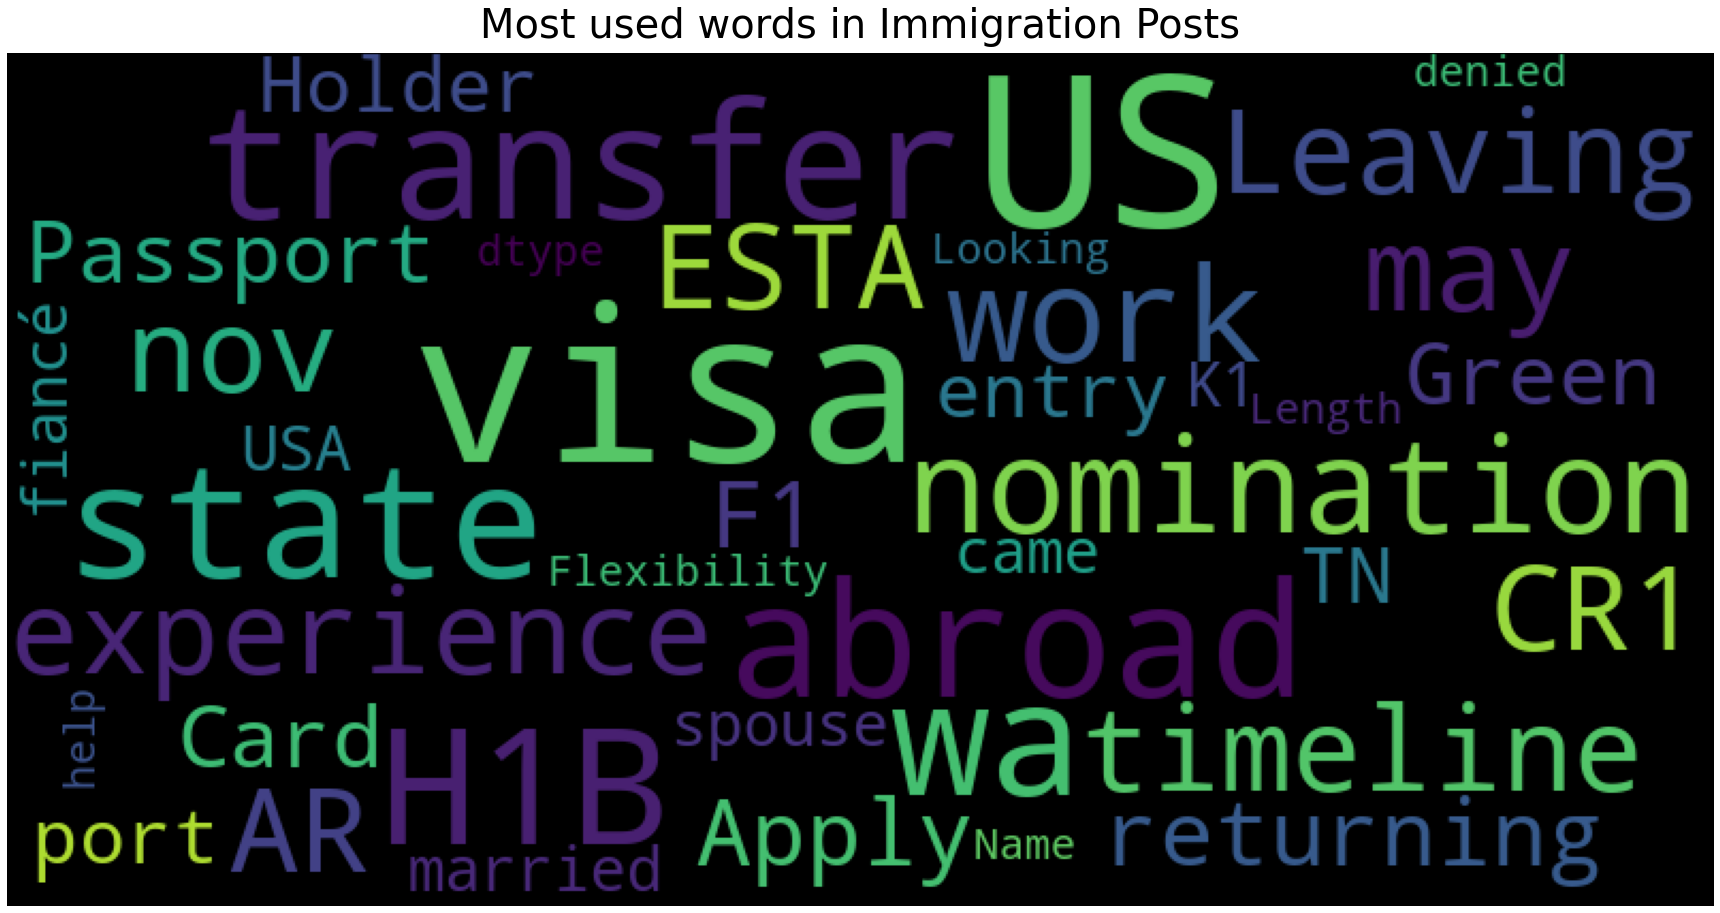

In [49]:
plot_wordcloud(reddit_posts['title'], title="Most used words in Immigration Posts")